In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Apr  9 11:30:06 2025

@author: anteravlic
"""


#Important commands to run the latex/science part of this plot
# pip install SciencePlots

# pip install --upgrade SciencePlots
# sudo apt-get update && sudo apt-get install -y texlive-latex-base

import numpy as np
# import matplotlib.pyplot as plt
# plt.style.use('science')


import matplotlib.pyplot as plt

# Absolute path to the .mplstyle file  (had a lot of issues getting science style to work)
plt.style.use('/home/codespace/.local/lib/python3.12/site-packages/scienceplots/styles/science.mplstyle')
plt.rcParams['text.usetex'] = False  # Use built-in mathtext instead of full LaTeX

import matplotlib.cm as cm
import matplotlib.colors as mcolors



# Create a truncated colormap (0 to %)
def truncate_colormap(cmap, min_val=0.0, max_val=0.85, n=256):
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        f'trunc({cmap.name},{min_val:.2f},{max_val:.2f})',
        cmap(np.linspace(min_val, max_val, n))
    )
    return new_cmap


# split the data into test set and so on
alpha_values = np.linspace(0.400,0.850,10)
formatted_alpha_values = [f"{num:.4f}" for num in alpha_values]

beta_values = np.linspace(1.4,2.0,13)
formatted_beta_values = [f"{num:.4f}" for num in beta_values]


chosen_params_color=formatted_beta_values

In [15]:



cmap = truncate_colormap(cm.inferno, min_val=0, max_val=0.9)




# cmap = plt.get_cmap('inferno')
colors = cmap(np.linspace(0, 1, len(chosen_params_color)))


norm = mcolors.Normalize(vmin=min(chosen_params_color), vmax=max(chosen_params_color))

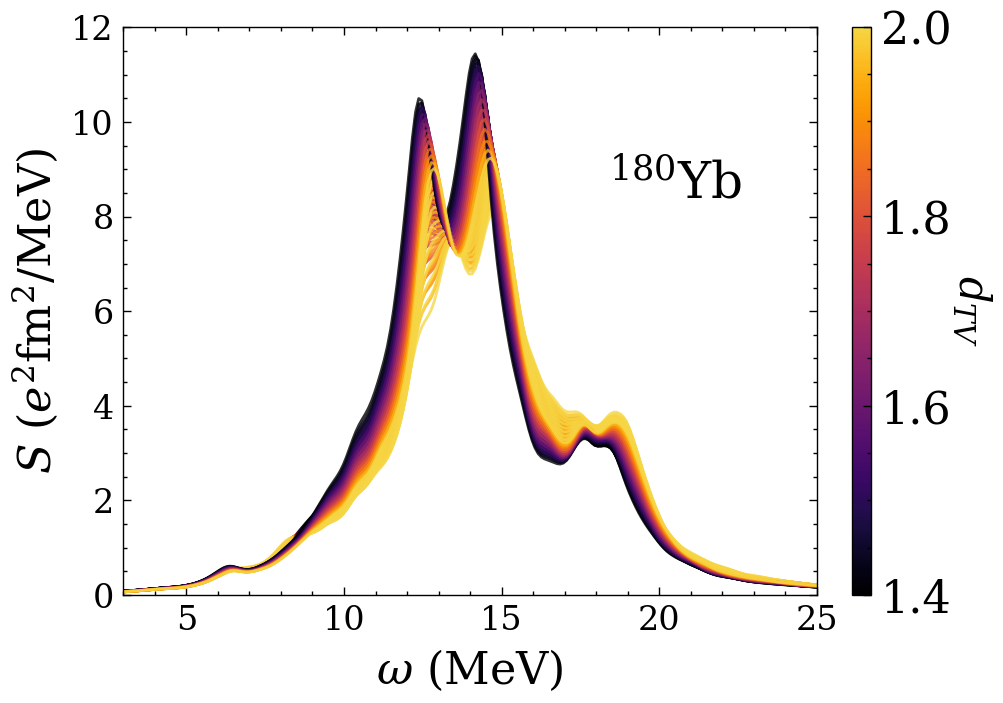

In [18]:
plt.rc("xtick", labelsize=16)
plt.rc("ytick", labelsize=16)

fig,ax = plt.subplots(figsize=(5, 3.5),dpi=200,constrained_layout=True)



for alpha in formatted_alpha_values:
    j=0
    for beta in formatted_beta_values:
        
        # first open the file with the data
        file_strength = np.loadtxt('../dipoles_data/total_strength/strength_'+beta+'_'+alpha+'.out')
        file_alphaD = np.loadtxt('../dipoles_data/total_alphaD/alphaD_'+beta+'_'+alpha+'.out')
        
        file_strength = file_strength[file_strength[:,0] > 1]
        
        ax.plot(file_strength[:,0], file_strength[:,1], alpha = 0.8, color = colors[j])
        j=j+1

# Axes limits
ax.set_xlim(3, 25)
ax.set_ylim(0)

# Axis labels
ax.set_xlabel(r'$\omega$ (MeV)', size=16)
ax.set_ylabel(r'$S$ ($e^2$fm$^2$/MeV)', size=16)

# Annotation
ax.annotate(r'${}^{180}$Yb', (0.7, 0.7), xycoords='axes fraction', size=18)

# Tick parameters
ax.tick_params(axis="y", direction="in", which='both', labelsize=12)
ax.tick_params(axis="x", direction="in", which='both', labelsize=12)


# Add a color bar to represent param values
sm = plt.cm.ScalarMappable(cmap=cmap,norm=norm)
sm.set_array([])  # Dummy array for the color bar
cbar = plt.colorbar(sm, ax=ax, aspect=30, pad=0.02)  # Link to Axes
cbar.set_label(r'$d_{TV}$', rotation=270, labelpad=15,fontsize=15)
# plt.legend()
plt.savefig("DipoleYbRainbow.pdf", format="pdf", bbox_inches="tight")
plt.show()


#plt.savefig('isovector_dipole_variation.pdf', bbox_inches='tight')